# INFO284 - Machine Learning group exam

Candidates: 195, 108, 152 and 231

## Task 1 - Machine learning on tabular mushrooms

In this task we will create three machine learning models predicting mushroom edibility. The dataset that will be used in this paper is collected from UCI containing 22 features of Gilled mushrooms in the Agaricus and Lepiota Family (G.H. Lincoff, 1981). We will build a logistic regression, K-nearest neighbor and a support vector machine model to analyse indicative and discuss the performance of the models.

Preprocessing

In [ ]:
#Supports reading, cleaning and proprocess data:
import pandas as pd 
#To work with arrays and matrices:
import numpy as np
#To visualize the data:
import matplotlib.pyplot as plt 
#To convert the data to numerical values:
from sklearn.preprocessing import LabelEncoder
#To scale data so that all the features have univarians:
from sklearn.preprocessing import StandardScaler
#To split the data into test data:
from sklearn.model_selection import train_test_split

Models

In [ ]:
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
#Support Vector Machine:
from sklearn.svm import SVC
#K-Neighrest Neigbour:
from sklearn.neighbors import KNeighborsClassifier

Tools for analysis

In [ ]:
#Heapmap:
import seaborn as sns
#Cross value score:
from sklearn.model_selection import cross_val_score
#Confuion matrix:
from sklearn.metrics import confusion_matrix
#Classification report:
from sklearn.metrics import classification_report

### Task 1.a: Building machine learning models

Preprocessing

In [ ]:
#Opening the csv file and reading it
df = pd.read_csv("agaricus-lepiota.csv")

In [ ]:
#List with new defined column names for our data
column_names = [
    "class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]

#Setting the list as the "names" variable in the data frame to make them more readble for further analysis
df = pd.read_csv("agaricus-lepiota.csv", header=None, names=column_names)

In [ ]:
#The column names are now updated in the dataframe
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
#We replace all the "?" in the dataframe with NaN values
df.replace("?", pd.NA, inplace = True)

#Remove all the NaN values in the data frame. Axis=1 indicates that we wanted to remove columns, not rows.
df.dropna(axis=1, inplace=True)

In [ ]:
#Checking if the values are dropped (no "?" values):
for i in df:
    print(df[i].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
#We now wanted to get an insight to how the mushrooms were distributed across the features
df_columns = df.columns.to_list()
print("Value distribution:\n")
for col in df_columns:
    #Prints every column and counts the values distributed among every feature:
    print(col, "\n", df[col].value_counts(), "\n\n")

Value distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

/tmp/ipykernel_271/2867613664.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


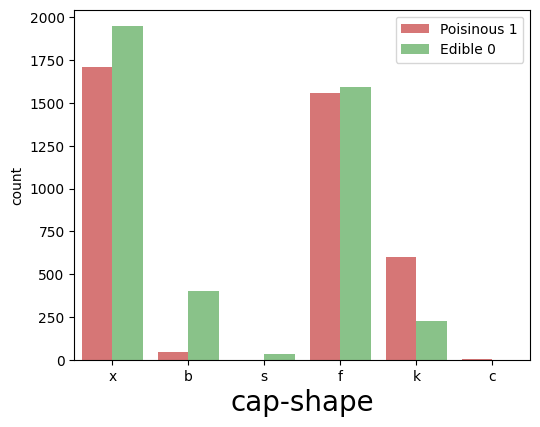

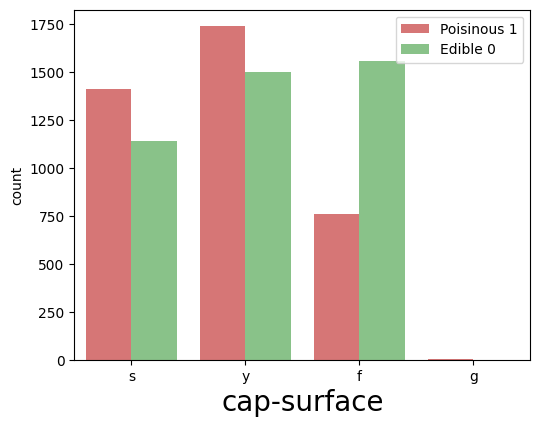

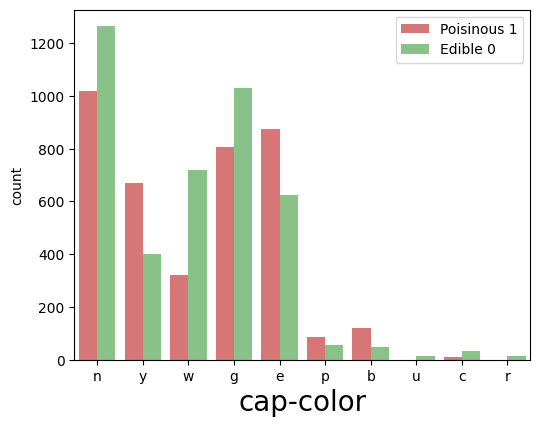

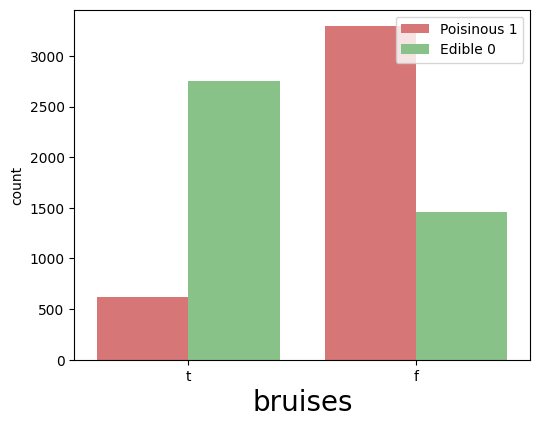

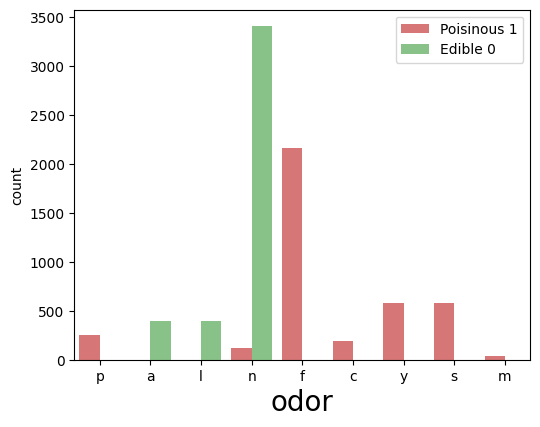

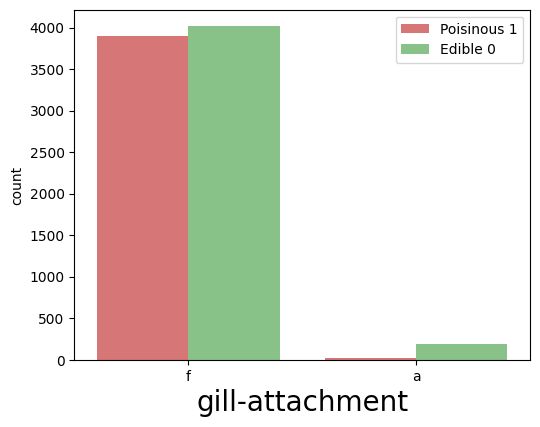

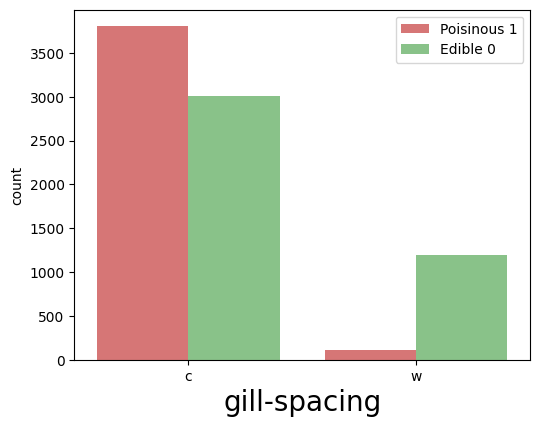

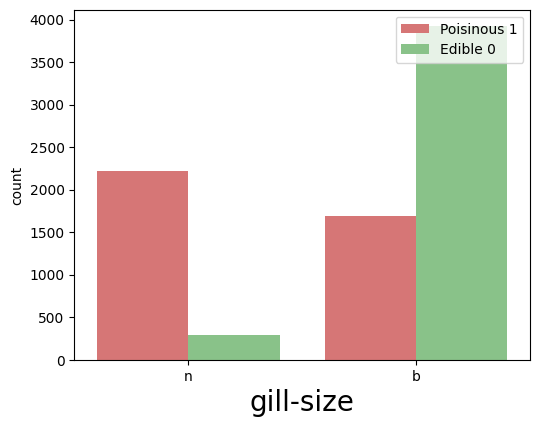

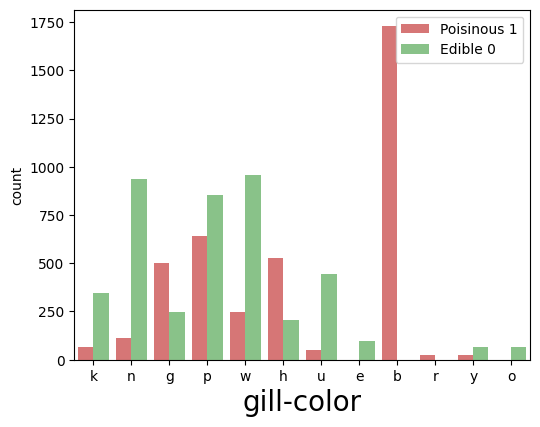

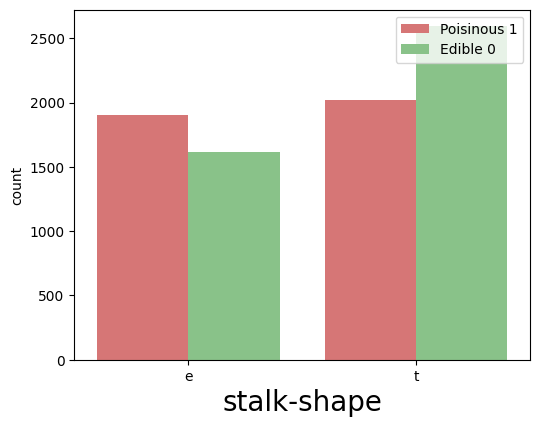

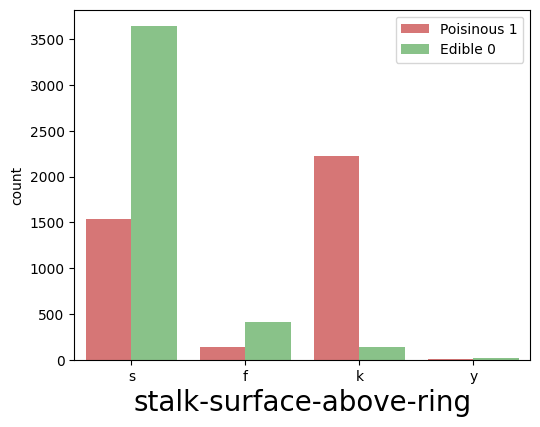

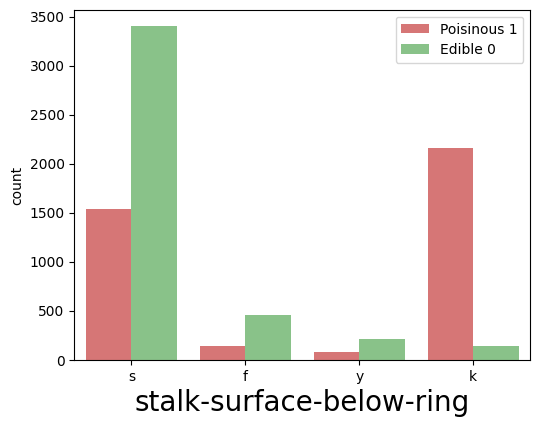

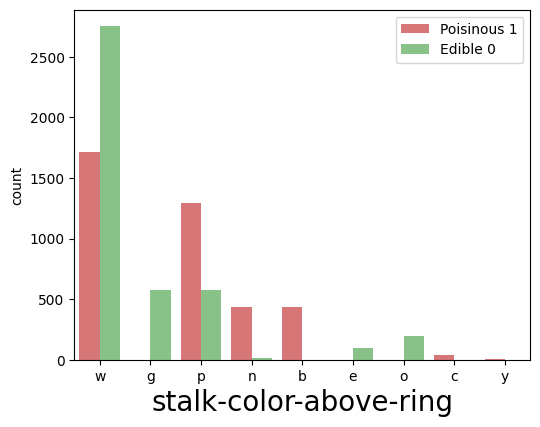

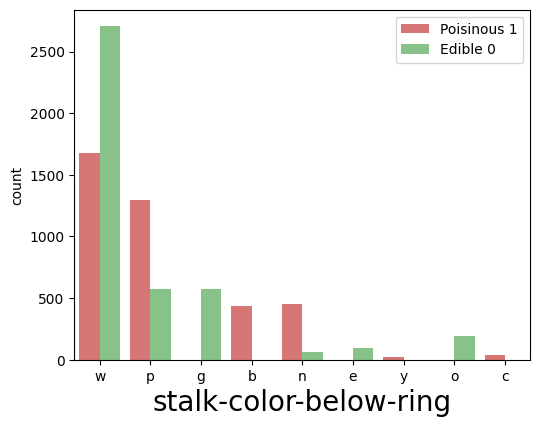

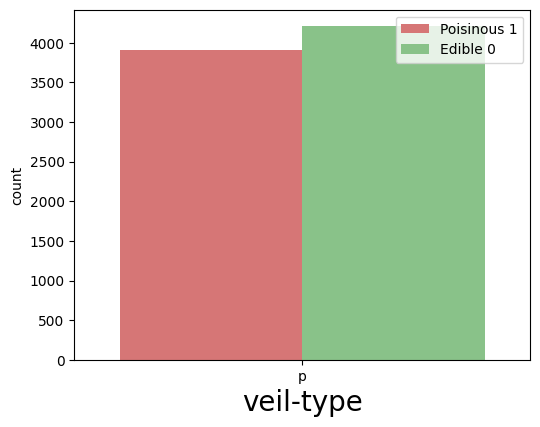

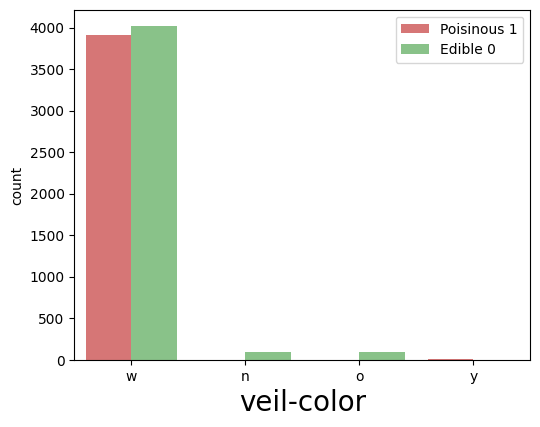

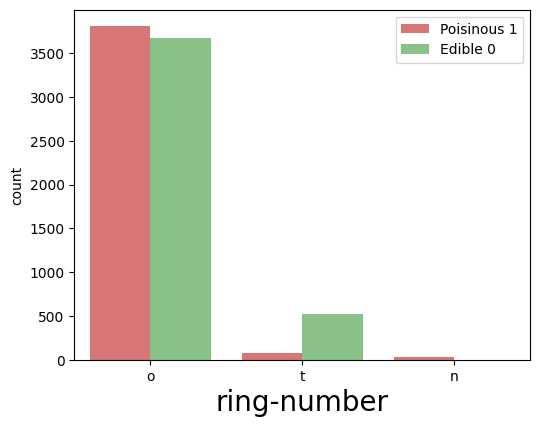

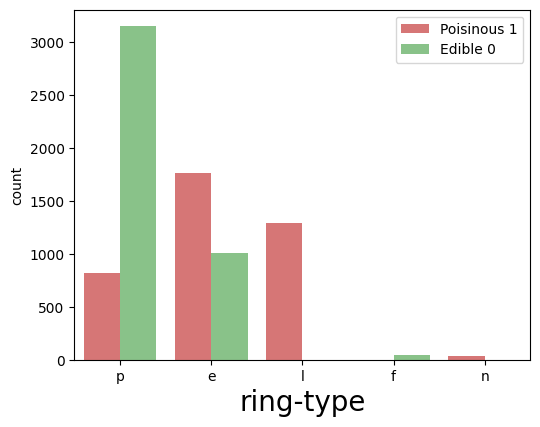

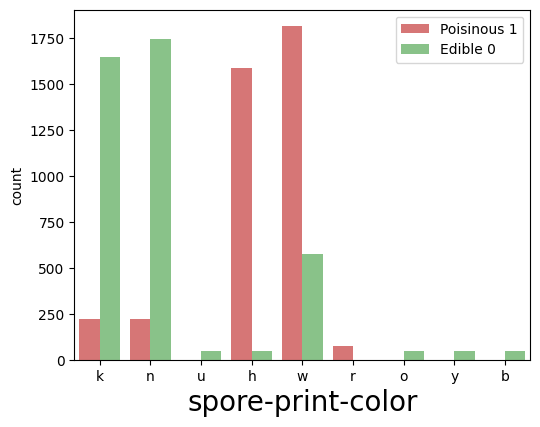

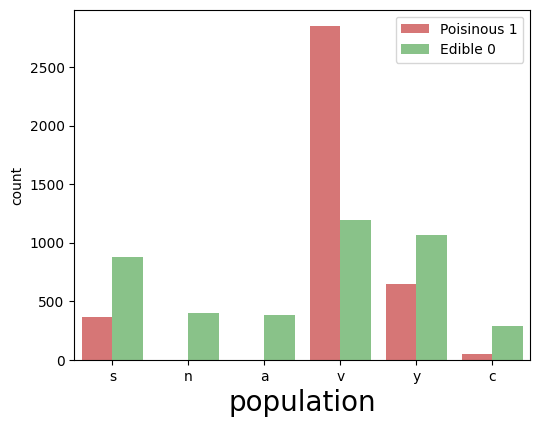

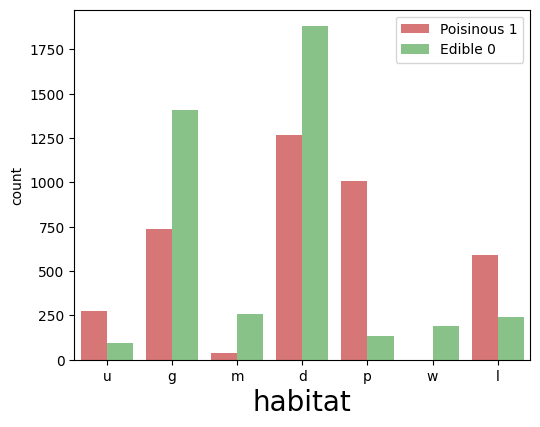

In [ ]:
# Custom palette with red and green colors
custom_palette = sns.color_palette("husl", 2)
custom_palette[0] = (0.9, 0.4, 0.4) # lighter red = e
custom_palette[1] = (0.5, 0.8, 0.5) #lighter green = p

# Loop over columns and create countplots with custom palette
for col in df_columns[1:]:
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    sns.countplot(x=col, hue="class", data=df, palette=custom_palette)
    plt.xlabel(col, fontsize=20)
    plt.legend(labels=["Poisinous 1", "Edible 0"], loc="upper right")

In [ ]:
#Check the distribution of mushrooms on each variable within the feature
[pd.pivot_table(df, index=[col,"class"], aggfunc = {col:np.count_nonzero}) for col in df.columns[1:]]

[                 cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e           1264
           p           1020
 p         e             56
          

We chose to delete several features to minimize overfitting in the models. Overfitting prevents models from generalizing observed data to unseen data (Ying 2019, 1). One strategy to minimize overfitting is regularization. This method selects only useful features and removes useless features (Ying 2019, 4). Before we started training the models, we therefore removed several features from the input data:

Gill attachment, veil color and stalk shape: samples have no significant explanatory power on the class because they are distributed almost 50/50 in one value.

- Stalk surface below ring and stalk color below ring: They have about the same outcomes as surface and color above ring, and are therefore not necessary to include. 

- Veil type: does not contain any data.

- Ring number: most mushrooms only has 1 ring, and are distributed almost 50/50 in the class. 

Splitting the data

In [ ]:
#List of every column we want to delete
df_columns_todelete = ["class","ring-number","gill-attachment", "veil-color", "stalk-surface-below-ring",
"stalk-color-below-ring", "veil-type","stalk-shape"]

X = df.copy()

#Deleting every "useless" column in df for X
for col in df_columns_todelete:
    X = X.drop(col, axis = 1)

#One-hot encoding to get numeric variables
X = pd.get_dummies(X, columns=X.columns, drop_first=True)

#y includes only the class from the dataframe
y = df["class"]

#Encoding the class to get dummy variables
Encoder_for_y = LabelEncoder()
y = Encoder_for_y.fit_transform(y)

In [ ]:
#Scale all the values in X 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [ ]:
# Define the range of k values to test
k_values = np.arange(2, 11)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
#Before we start traing: Check the presentage of examples which are positives vs negatives
np.sum(y) / len(y)

0.48202855736090594

Machine learning models 

### K-nearest neighbor

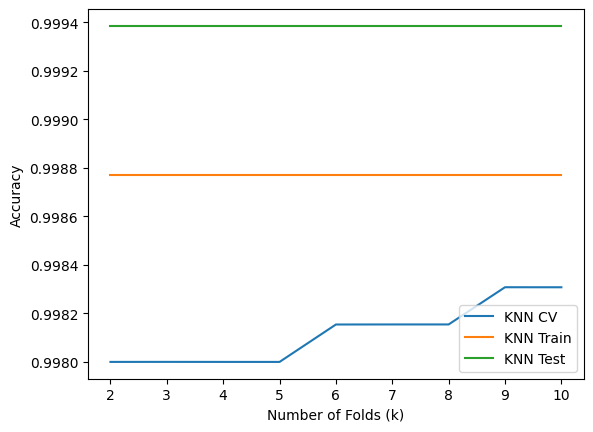

In [ ]:
#Setting n_neigbors=10 after experimenting with different measures 
knn_model = KNeighborsClassifier(n_neighbors=10)

#Storing the scores in lists
knn_cv_scores = []
knn_test_scores = []
knn_train_scores = []

#Fitting the models and appending the scores in the lists
for k in k_values:
    knn_model.fit(X_train, y_train)
    knn_cv_scores.append(np.mean(cross_val_score(knn_model, X_train, y_train, cv=k)))
    knn_test_scores.append(knn_model.score(X_test, y_test))
    knn_train_scores.append(knn_model.score(X_train, y_train))

# Plot the cross-validation, training, and test scores for KNN
plt.plot(k_values, knn_cv_scores, label="KNN CV")
plt.plot(k_values, knn_train_scores, label="KNN Train")
plt.plot(k_values, knn_test_scores, label="KNN Test")
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predict the test data
y_pred = knn_model.predict(X_test)

# Create the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm1, "\n")

# Print classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

Confusion matrix:
 [[848   0]
 [  1 776]] 

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(f"Test scores: {knn_test_scores}")
print(f"Cross validation scores: {knn_cv_scores}")
print(f"Training scores: {knn_train_scores}")

Test scores: [0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154, 0.9993846153846154]
Cross validation scores: [0.9979998105926084, 0.9979999525607468, 0.9979998105342932, 0.9979997631314029, 0.9981539877725648, 0.9981542007137288, 0.998154224153079, 0.9983075971455416, 0.9983074552566078]
Training scores: [0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832, 0.9987690413909832]


### Support vector machine

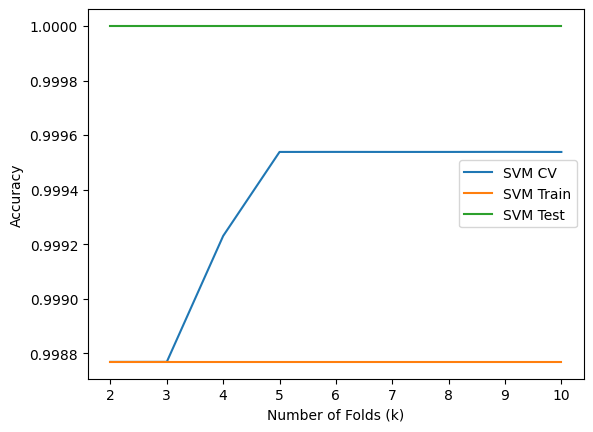

In [ ]:
#Storing the scores in lists
svm_cv_scores = []
svm_test_scores = []
svm_train_scores = []

#Fitting the model and appending the scores in the lists
for k in k_values:
    svm_model = SVC(C=k, kernel="rbf")
    svm_model.fit(X_train, y_train)
    svm_cv_scores.append(np.mean(cross_val_score(svm_model, X_train, y_train, cv=k)))
    svm_test_scores.append(svm_model.score(X_test, y_test))
    svm_train_scores.append(svm_model.score(X_train, y_train))


# Plot the cross-validation and test scores for SVM
plt.plot(k_values, svm_cv_scores, label="SVM CV")
plt.plot(k_values, knn_train_scores, label="SVM Train")
plt.plot(k_values, svm_test_scores, label="SVM Test")
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predict the test data
y_pred = svm_model.predict(X_test)

# Create the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix svm:\n", cm3, "\n")

# Print classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

Confusion matrix svm:
 [[848   0]
 [  0 777]] 

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(f"Test scores: {svm_test_scores}")
print(f"Cross validation scores: {svm_cv_scores}")
print(f"Training scores: {svm_train_scores}")

Test scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Cross validation scores: [0.998769136065535, 0.9987692780555246, 0.9992306744979159, 0.9995383431041629, 0.9995384614510964, 0.9995383430459152, 0.9995383666890856, 0.9995385323370058, 0.9995382244873771]
Training scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Logistic regression

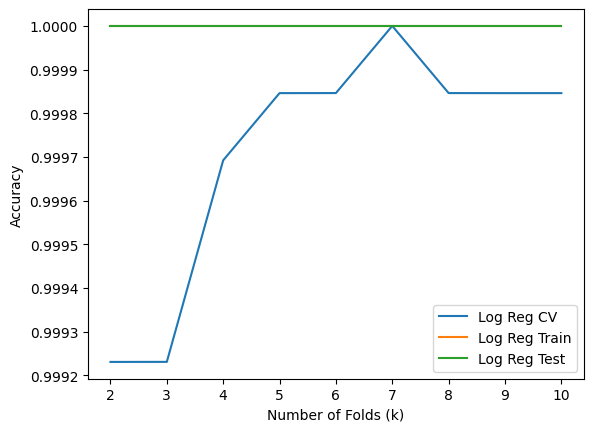

In [ ]:
log_model = LogisticRegression(max_iter=1000, solver='sag')

#Storing the scores in lists
logreg_cv_scores = []
logreg_test_scores = []
logreg_train_scores = []

#Fitting the models and appending the scores to the lists
for k in k_values:
    log_model.fit(X_train, y_train)
    logreg_cv_scores.append(np.mean(cross_val_score(log_model, X_train, y_train, cv=k)))
    logreg_test_scores.append(log_model.score(X_test, y_test))
    logreg_train_scores.append(log_model.score(X_train, y_train))

# Plot the cross-validation and test scores for Logistic regression
plt.plot(k_values, logreg_cv_scores, label="Log Reg CV")
plt.plot(k_values, logreg_train_scores, label="Log Reg Train")
plt.plot(k_values, logreg_test_scores, label="Log Reg Test")
plt.xlabel("Number of Folds (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Predict the test data
y_pred = log_model.predict(X_test)

# Create the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix log reg:\n", cm2, "\n")

# Print classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Confusion matrix log reg:
 [[848   0]
 [  0 777]] 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       777

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
print(f"Test scores: {logreg_test_scores}")
print(f"Cross validation scores: {logreg_cv_scores}")
print(f"Training scores: {logreg_train_scores}")

Test scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Cross validation scores: [0.9992307692307693, 0.9992308875557606, 0.9996923076923077, 0.9998461538461537, 0.9998462484624846, 1.0, 0.9998462484624846, 0.9998461064943059, 0.9998461538461537]
Training scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Task 1.b: Indicative features

To determine the most indicative features for edible mushrooms, we limited the extent of the features and analysis to the ten top most correlating features to see which feature has the highest correlation with the class. We also wanted to look at the percentage distribution in the ten top most features among the class (percentage of edible and poisonous).

In [ ]:
#Checking how the mushrooms are distributed among edible and poisonos
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

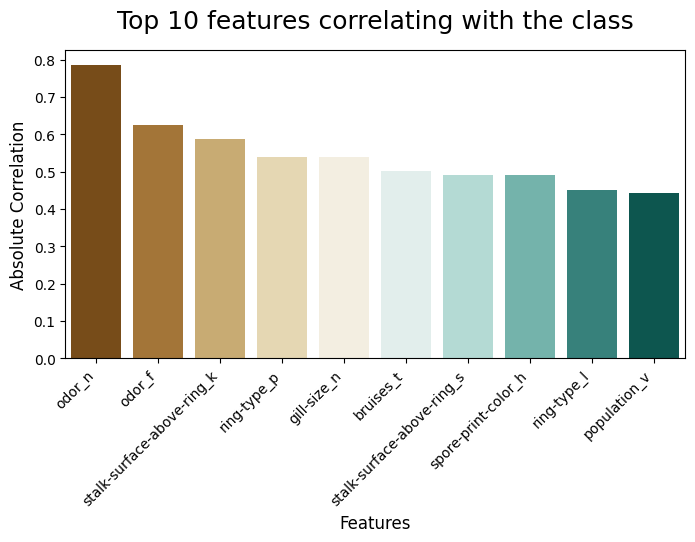

In [ ]:
#Creating a dataset with only the features we had in X so that we exclude the same features
df_corr_columns_todelete = ["ring-number","gill-attachment", "veil-color", "stalk-surface-below-ring",
 "stalk-color-below-ring", "veil-type","stalk-shape"]

corr_data = df.copy()
for col in df_corr_columns_todelete:
    corr_data = corr_data.drop(col, axis = 1)

#One hot encoding to get the numeric variables
corr_data = pd.get_dummies(corr_data, columns=corr_data.columns, drop_first=True)


#Sorting the correlations in descending order and selecting the top 10 features (excluding class) correlating with the class
top_corr = corr_data.drop('class_p', axis=1).corrwith(corr_data['class_p']).abs().sort_values(ascending=False).head(10)

#Create a bar chart using matplotlib
plt.figure(figsize=(8, 4))
sns.barplot(x=top_corr.index, y=top_corr.values, palette='BrBG')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 features correlating with the class', fontsize=18, pad=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Absolute Correlation', fontsize=12)
plt.show()

In [ ]:
#Iterating trough the top_corr items to print out the feature name and correlation value
for feature, corr in top_corr.items():
    print(f"Feature: {feature}\n --- Correlation: {corr}")

Feature: odor_n
 --- Correlation: 0.785556622236696
Feature: odor_f
 --- Correlation: 0.6238419598140365
Feature: stalk-surface-above-ring_k
 --- Correlation: 0.5876582576306931
Feature: ring-type_p
 --- Correlation: 0.540468912774707
Feature: gill-size_n
 --- Correlation: 0.5400243574330171
Feature: bruises_t
 --- Correlation: 0.5015303774075575
Feature: stalk-surface-above-ring_s
 --- Correlation: 0.4913141807116959
Feature: spore-print-color_h
 --- Correlation: 0.4902291705695327
Feature: ring-type_l
 --- Correlation: 0.4516190663173327
Feature: population_v
 --- Correlation: 0.44372237905534284


In [ ]:
def calculate_percentages(edible, poisonous):
    total = edible + poisonous
    percentage_edible = round((edible / total) * 100, 2)
    percentage_poisonous = round((poisonous / total) * 100, 2)
    return (f" Edible: {percentage_edible} %, Poisinous: {percentage_poisonous} %")

print(f"Odor, none: \n --- {calculate_percentages(3408, 120)}")
print(f"Odor, foul: \n --- {calculate_percentages(0, 2160)}")
print(f"Stalk surface above ring, silky: \n --- {calculate_percentages(144, 2228)}")
print(f"Ring type, large: \n --- {calculate_percentages(816, 3152)}")
print(f"Gill size, narrow: \n --- {calculate_percentages(228, 2224)}")
print(f"Bruises: \n --- {calculate_percentages(624, 2752)}")
print(f"Stalk surface above ring, smooth: \n --- {calculate_percentages(3640, 1536)}")
print(f"Spore print color, chocolate: \n --- {calculate_percentages(48, 1584)}")
print(f"Ring type, flaring: \n --- {calculate_percentages(48, 0)}")
print(f"Population, several: \n --- {calculate_percentages(1192, 2848)}")

Odor, none: 
 ---  Edible: 96.6 %, Poisinous: 3.4 %
Odor, foul: 
 ---  Edible: 0.0 %, Poisinous: 100.0 %
Stalk surface above ring, silky: 
 ---  Edible: 6.07 %, Poisinous: 93.93 %
Ring type, large: 
 ---  Edible: 20.56 %, Poisinous: 79.44 %
Gill size, narrow: 
 ---  Edible: 9.3 %, Poisinous: 90.7 %
Bruises: 
 ---  Edible: 18.48 %, Poisinous: 81.52 %
Stalk surface above ring, smooth: 
 ---  Edible: 70.32 %, Poisinous: 29.68 %
Spore print color, chocolate: 
 ---  Edible: 2.94 %, Poisinous: 97.06 %
Ring type, flaring: 
 ---  Edible: 100.0 %, Poisinous: 0.0 %
Population, several: 
 ---  Edible: 29.5 %, Poisinous: 70.5 %


### Discussing the ten most indicative features

Looking at the above results we can see that everyone of the ten features has significantly high correlation values. They all have explanatory power in the dependent variable. However, there are some noticeable things to address. Odor is highly correlated with the class. Samples with odor "none" are edible in 97% of the cases with a correlation value on 0.785. Samples with odor "foul" seems to always be poisonous and has a correlation value on 0.623. As one can see in the graph down below, the samples are also often distributed in one of the two categories which means that the features are significantly indicative when predicting the edibility of a mushroom. Spore print color has a slightly lower correlation with the class, but considering the estimate on 97.06% poisonous if the mushroom has a chocolate colored spore print color is precise. Looking at the graph down below one can also see that there are more categories containing many samples in this features that are either almost fully edible or poisonous, for example black or brown.

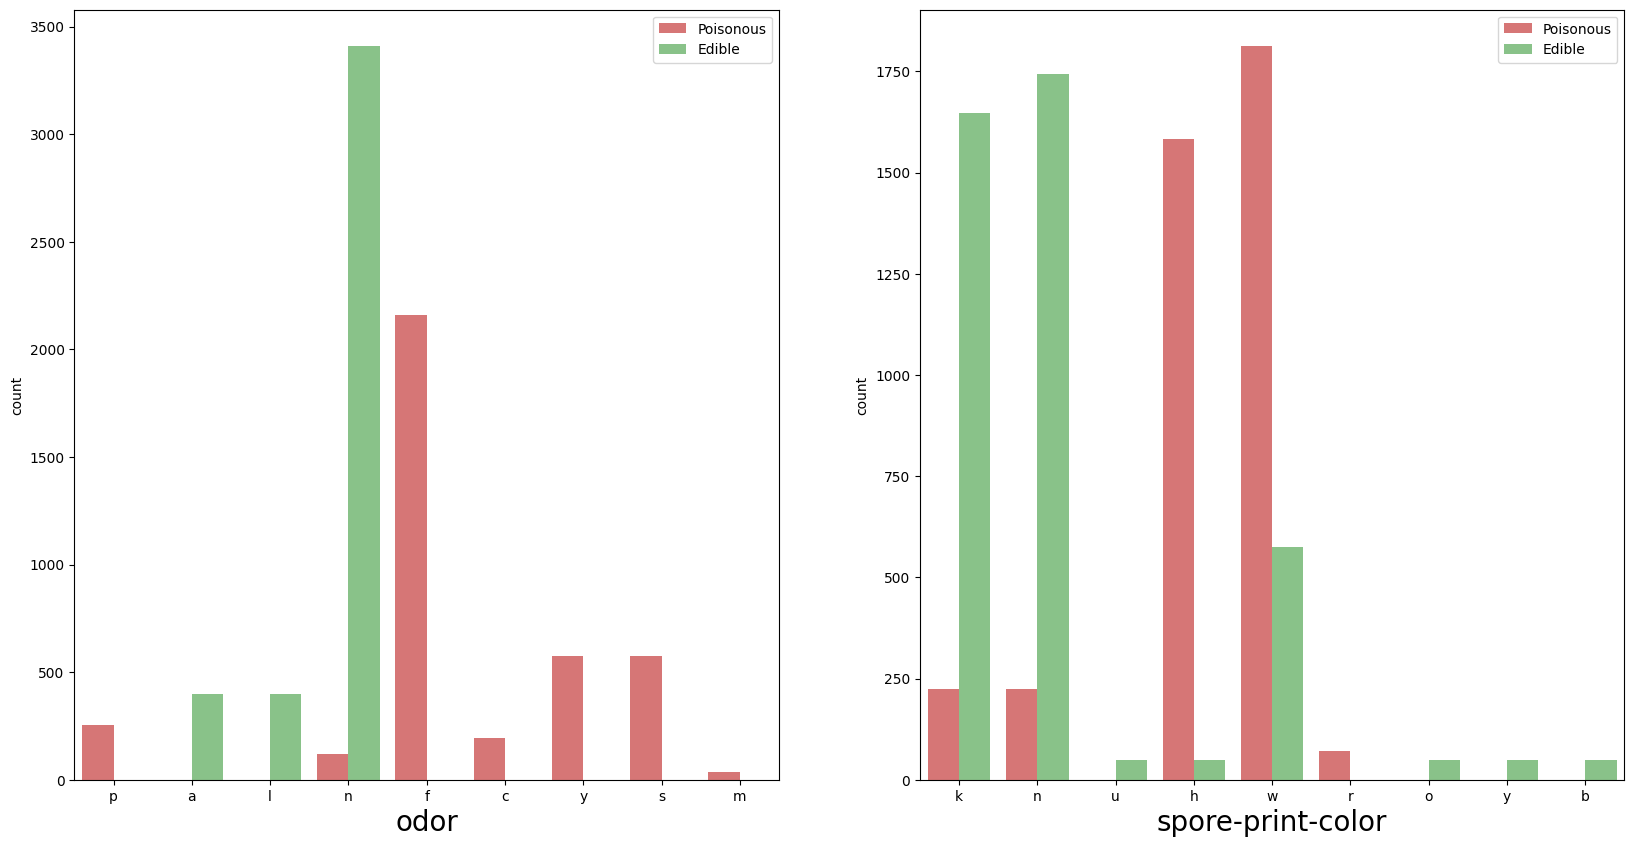

In [ ]:
#Odor and spore print color edible and poisonos distribution: 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i, col in enumerate(['odor', 'spore-print-color']):
    sns.countplot(x=col, hue="class", data=df, palette=custom_palette, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=20)
    axes[i].legend(labels=["Poisonous", "Edible"], loc="upper right")

Amongst the other features, they also have strong correlation values with the class, but the estimates are more uncertain. For example population "several" only has a 70% estimate of being poisonous and the distinction between "silky" and "smooth" stalk surface above ring could be difficult to separate in the real world. Also, feature such as "flaring" ring type only contains 48 samples. Therefore, to conclude, odor and spore print color seems to be the most indicative. This gives us more insight to our models´ performance, which we now want to discuss further. 

### Task 1.c: Discussion

Looking at the scores for our three models we can draw several conclusions. Firstly, all models get overall high scores in train, test, cross validation and classification report scores. The first noticeable thing is that in all three models the training and test data are statical. This could be positive, but seeing that the test data is often higher than the training data, this could indicate overfitting and that the models have memorized the training data. Therefore, they might not be able to generalize unseen data. All three models´ cross validation score seems to be increasing highly and then flatten out, but ideally we want them to move in a normalized curve (Müller & Guido 2018, 31). The UCI dataset has a large number of features, each with many possible values, which can lead to high dimensional feature space. This is particularly a pronounced problem for non-parametric algorithms lik K-NN, which is dependent to find the closest points. With a high dimensional space, the distances between closest points are increasingly similar, making it difficult to differentiate between classes. As seen in the results of SVM and Logistic regression this seems to be a problem for parametric models as well. These models´ purpose is to fit a decision boundary to distinguish different classes of data, and as the number of dimensions increase, the complexity of the decision boundary also increase (Raj 2020 and Gandhi 2018). 

Out of the three models, logistic regression seems to be the one with the best results both in cross validation scores, training and test scores. The model also has no false positives or negatives in the confusion matrix, which means that it never predicts wrong on poisonous or edible samples. Logistic regression learns the weight for each feature, and then decides the contribution of each feature to the final classification decision. Overall, the models might not be able to generalize well on unseen data, and are generalized only on the training data. For these reasons, it would be hard to trust any of the models to predict edibility of mushrooms despite their overall high scores. As shown in task 1.b there are problems even with the ten most indicative features for classification. Even though we preprocessed the data to avoid overfitting, this seems to be unavoidable. However, it's clear that two features stand out as the most indicative (odor and spore print color), and for future work it would be interesting to train the models purely on these features. Also, it would be interesting to explore other models such as Decision Tree or Random Forest classifier. 

## Task 2 - Sentiment analysis 

### Introduction

In this task, we are going to do sentiment analysis on a dataset containing around 10,000 sentences that are categorized as positive, neutral, or negative. Our goal is to build a model that can accurately classify the sentiment of each sentence. We will describe how we prepared the data for the model and discuss our results. 

### Task 2.a & b: Building a model that can classify sentences with their sentiment & describing how we prepared the data for the model 

### Importations

Installation

In [2]:
# Installing spacy library to perform natural language processing tasks
!pip install -U spacy

# Downloading the nb_core_news_lg model for Norwegian language
# This model is pre-trained to recognize linguistic features of Norwegian text
!python -m spacy download nb_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.9/924.9 KB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 KB 6.9 MB/s eta 0:00:00
  Attempting uninstall: spacy-legacy
    Found existing installation: spacy-legacy 3.0.10
    Not uninstalling spacy-legacy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'spacy-legacy'. No files were found to uninstall.
  Attempting uninstall: pathy
    Found existing installation: pathy 0.6.2
    Not uninstalling pathy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pathy'. No files were found to uninstall.
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Not uninstalling thinc at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'thinc'. No 

Preprocessing 

In [3]:
# Importing necessary libraries

import pandas as pd # Supports reading data from various sources 
import nltk # Provides tools for processing and analysing text data
from nltk.corpus import stopwords # Stopwords module from NLTK corpus for removing stopwords
nltk.download('stopwords') # Downloading stopwords 

import spacy # Provides tools for NLP
from sklearn.feature_extraction.text import TfidfVectorizer # Converting text data into numerical format

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-03 08:51:46.730207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 08:51:46.901729: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `

Building the model

In [4]:
# Necessary libraries to build the logiostic regression model
from sklearn.linear_model import LogisticRegression

# For calculating the model accuracy 
from sklearn.metrics import accuracy_score

# For generating classification report 
from sklearn.metrics import classification_report

Visualization

In [6]:
# For creating confusian matrix
import matplotlib.pyplot as plt

# For creating heatmap 
import seaborn as sns

# For visualization
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

### Loading the dataframes

Converting the JSON files to pandas dataframes can simplify the preprocessing steps needed for text classification with logistic regression. Data frames provide an organized structure for processing text data, including removing stop words and lemmatizing. Additionally, data frames can be directly used as input to popular machine learning libraries in Python, making it easier to train and evaluate the logistic regression model (Stojiljković 2023).

We also removed the "sent_id" columns because this column has no crucial information, nor will this column affect the evaluation of the sentence and their sentiment. 

In [7]:
# Loading the JSON files as dataframes and removing the sent_id column
df_train = pd.read_json('3class/train.json', orient='values')
df_train.pop("sent_id")

df_dev = pd.read_json('3class/dev.json', orient='values')
df_dev.pop("sent_id")

df_test = pd.read_json('3class/test.json', orient='values')
df_test.pop("sent_id")

0       201344-01-01
1       201344-02-01
2       201344-03-01
3       201344-03-02
4       201344-04-01
            ...     
1176    601408-06-01
1177    601408-06-02
1178    601408-06-03
1179    601408-07-01
1180    601408-08-01
Name: sent_id, Length: 1181, dtype: object

### Preprocessing the data

It is important to preprocess the data before training and analyzing the model. By preprocessing the data, we can reduce the complexity of the text data and ensure that the model is focusing on the most relevant information, which can lead to more accurate predictions (Indeed Editorial Team 2023). In this part of the task we will go through each step of the preprocessing. 

Removing special characters and numbers

In [8]:
# Removing special characters and numbers from the text column in the dataframes 
df_train['text'] = df_train['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()
df_dev['text'] = df_dev['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()
df_test['text'] = df_test['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()

/tmp/ipykernel_91/495221322.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['text'] = df_train['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()
/tmp/ipykernel_91/495221322.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dev['text'] = df_dev['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()
/tmp/ipykernel_91/495221322.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['text'] = df_test['text'].str.replace(r"[^a-zA-Zæøå ]+", " ").str.strip()


Special characters and numbers can be irrelevant to the meaning of the text. By removing them we reduce unnecessary noise, making the text more consistent and allowing the model to focus on the relevant aspects of the text (Yadav 2020).

Removing NaN values

In [9]:
# Removing NaN values if there are any 
df_train = df_train.dropna()
df_dev = df_dev.dropna()
df_test = df_test.dropna()

Removing NaN values is important to ensure the accuracy and reliability of the machine learning model, as they can cause errors and interfere with analysis and modeling (Brownlee 2017).

Removing Stopwords

In [10]:
# Removing Norwegian stopwords from text column in the dataframes 

# Downloading the stopwords for Norwegian
stop_words = set(stopwords.words('norwegian'))

# Removing stopwords from the 'text' column in the dataframes
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
df_dev['text'] = df_dev['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

Stop words are a set of commonly used words that we remove from the text data to simplify the text. The stop words do not carry much information about the meaning of the data and removing them will therefore make the remaining text more valuable (Ganesan 2023).  

We used the Natural Language Toolkit to download the Norwegian stopwords (NLTK Project 2023). NLTK provides useful tools when processing text. 

Lemmatization

In [11]:
# Load the Norwegian language model in spaCy
nlp = spacy.load('nb_core_news_lg')

# Defining a function to lemmatize text using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# Apply the lemmatize_text function to the 'text' column in the training dataframe
df_train['text'] = df_train['text'].apply(lemmatize_text)

# Apply the lemmatize_text function to the 'text' column in the development dataframe
df_dev['text'] = df_dev['text'].apply(lemmatize_text)

# Apply the lemmatize_text function to the 'text' column in the testing dataframe
df_test['text'] = df_test['text'].apply(lemmatize_text)

Lemmatization is the process of reducing a word to its root form, by using the knowledge of a language and its rules. This method will reduce the number of unique words in the data, because different variations of the same word will merge into one single term. Lemmatization is a good method for reducing complexity of the text data, while still preserving the meaning and context of the words (Kargin 2021). 

We loaded the Norwegian Lemmatizer “nb_core_news_lg” from Spacy, which is a large pre-trained language model that has 500 000 unique vectors and keys (spaCy 2023).

Bag-of-words & TfidfVectorizer

In [12]:
# Creating a TfidfVectorizer object 
vectorizer = TfidfVectorizer(lowercase=False, stop_words=None)

# Fitting and transforming text data to the vectorizer on training data
X_train = vectorizer.fit_transform(df_train['text'])

# Transforming dev and test data to the vectorizer
X_dev = vectorizer.transform(df_dev['text'])
X_test = vectorizer.transform(df_test['text'])

# Assigning label values for training, dev and test data
y_train = df_train['label']
y_dev = df_dev['label']
y_test = df_test['label']

# Converting sparse matrix to dense array
X_train = X_train.toarray()
X_dev = X_dev.toarray()
X_test = X_test.toarray()

We used the TfidfVectorizer to create a bag-of-words representation of our text corpus, which is a numerical representation of the text data suitable for machine learning algorithms. The TfidfVectorizer counts the frequency of each word in each document and assigns a weight to each word based on its frequency and rarity across the corpus (scikit-learn developers 2023). We only used the TfidfVectorizer to create the bag-of-words representation since we had already preprocessed the text data (Guide et al. 2021).

### Building Logistic Regression Model 

Logistic regression was the ideal algorithm for our text classification task due to its ability to handle multi-class classification problems and predict the probability of a sentence belonging to each class.

We selected logistic regression because it is efficient, easy to implement, and can handle sparse data, which is common in natural language processing tasks.  Logistic regression can handle non-linear relationships between input features and the output variable, making it capable of capturing complex patterns in the data. This was essential for our text classification task, which involved a high-dimensional feature space. 

Logistic regression can also handle large datasets with many features and class imbalance, making it an appropriate choice for our task. (Muller & Guido 2016, p.26-29)

We set max_iter to 1000 in order to allow the logistic regression algorithm to continue optimizing the model for longer, which can lead to better performance. This is necessary when working with more complex datasets, especially those with many features or that are large, where the default value of 100 may not be enough.

In [18]:
# Initializing the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Training the model on the whole training set
log_reg.fit(X_train, y_train)

# Evaluating the model on all datasets
y_train_pred = log_reg.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_dev_pred = log_reg.predict(X_dev)
dev_acc = accuracy_score(y_dev, y_dev_pred)

y_test_pred = log_reg.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Printing the accuracies of all three datasets
print("Training accuracy:", train_acc)
print("Dev accuracy:", dev_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.8308039633763953
Dev accuracy: 0.6194188518781006
Test accuracy: 0.6172734970364098


Bar chart 

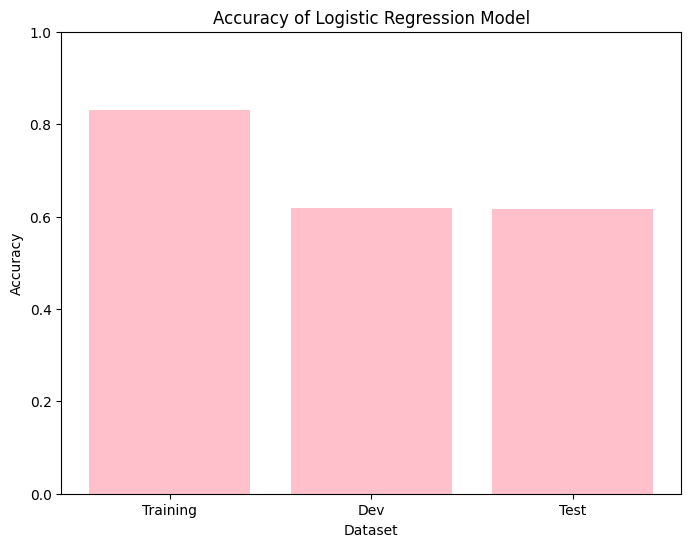

In [19]:
# Creating a bar plot of the accuracy 
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Training', 'Dev', 'Test'], [train_acc, dev_acc, test_acc], color='pink')
plt.title('Accuracy of Logistic Regression Model')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

We chose to create a bar chart of the accuracy on the training, dev and test set, to visualize the difference in our result. 

### Task 2.c: Discussing the results 

Visualizing the results

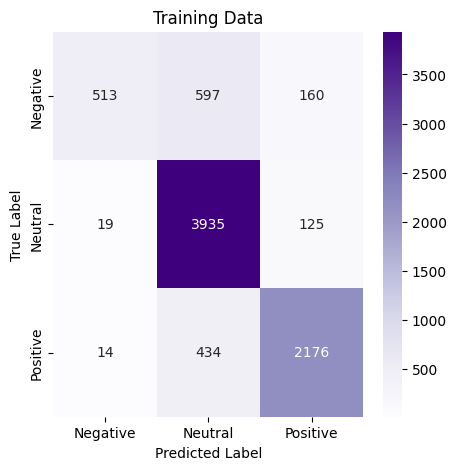

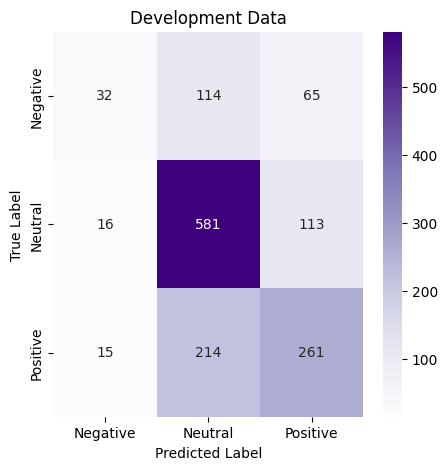

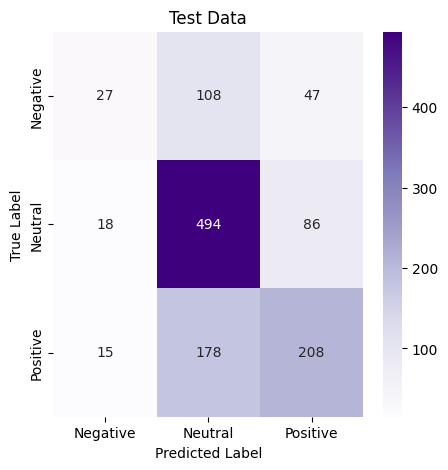

In [20]:
# Creating a function to plot the confusion matrix and heatmap
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap="Purples", fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

# Plotting the confusion matrix and heatmap for the training data
plot_confusion_matrix(y_train, y_train_pred, unique_labels(y_train))
plt.title("Training Data")
plt.show()

# Plotting the confusion matrix and heatmap for the development data
plot_confusion_matrix(y_dev, y_dev_pred, unique_labels(y_train))
plt.title("Development Data")
plt.show()

# Plotting the confusion matrix and heatmap for the test data
plot_confusion_matrix(y_test, y_test_pred, unique_labels(y_train))
plt.title("Test Data")
plt.show()


We made this heatmap confusion matrix to easily identify patterns by visualizing the misclassifications of the different classes. 

Classification report and Conclusion 

In [21]:
# Computing precision, recall, and F1-score for each class

print("Training Data:")
print(classification_report(y_train, y_train_pred, target_names=unique_labels(y_train)))

print("Development Data:")
print(classification_report(y_dev, y_dev_pred, target_names=unique_labels(y_train)))

print("Test Data:")
print(classification_report(y_test, y_test_pred, target_names=unique_labels(y_train)))


Training Data:
              precision    recall  f1-score   support

    Negative       0.94      0.40      0.56      1270
     Neutral       0.79      0.96      0.87      4079
    Positive       0.88      0.83      0.86      2624

    accuracy                           0.83      7973
   macro avg       0.87      0.73      0.76      7973
weighted avg       0.85      0.83      0.82      7973

Development Data:
              precision    recall  f1-score   support

    Negative       0.51      0.15      0.23       211
     Neutral       0.64      0.82      0.72       710
    Positive       0.59      0.53      0.56       490

    accuracy                           0.62      1411
   macro avg       0.58      0.50      0.50      1411
weighted avg       0.60      0.62      0.59      1411

Test Data:
              precision    recall  f1-score   support

    Negative       0.45      0.15      0.22       182
     Neutral       0.63      0.83      0.72       598
    Positive       0.61      0.

Using the 'classification_report' function in the scikit-learn library we generate a report of precision, recall, F1-score, and support for each class. This helped us gain insight into strengths and weaknesses of our logistic regression model. 

The given results show that the logistic regression text classifier has an overall accuracy of 83% on the training data, indicating that the model is effective in distinguishing between classes. However, it may struggle to identify negative sentiments. The high performance metrics on the training data suggest that the model may be overfitting, as the accuracy on the development and test data is relatively low compared to the training data. The model may also have a tendency to classify negative instances as neutral or positive, particularly in the training dataset.

The performance metrics on the development and test datasets are generally lower than those on the training dataset, indicating that the model may not be generalizing well to new data. Although the overall performance of the model is still relatively good, there may be room for improvement, particularly in its ability to accurately identify negative sentiments. The weighted average f1-score suggests that the model is still capable of making accurate predictions on new data (Scikit-learn developers 2023). 

Although the logistic regression model performed relatively well, there is always room for improvement. One way to improve the model is to use GridSearchCV to tune hyperparameters and find the optimal values. However, we chose not to do so in this case because it would significantly increase the training time. Other potential ways to improve the model could include using a different algorithm or feature engineering to extract more meaningful features from the data.

## Task 3 - Convolutional neural networks 

### Introduction

In this study, we are using the CIFAR-10 dataset to train a binary classifier for detecting whether an image contains an airplane or not. CIFAR-10 consists of 60.000 32x32 colored images, equally distributed among ten different classes (Krizhevsky 2009). We will employ a pre-trained VGG16 model, transfer learning techniques, and further demonstrate how to use the trained model to classify a new image as airplane or not airplane. 

At first we set up necessary parameters and variables for the model. We set the random seeds for both NumPy and TensorFlow to ensure reproducible results. We define the batch size (32), which determines the number of samples propagated through the network during training. The ten different class categories from the dataset are also given class names. Lastly, we specify the target class for our binary classification task as 'airplane', meaning our model will be trained to classify images as either airplane or not airplane.

### Data Loading and Preprocessing

We start by loading the CIFAR-10 dataset from Keras and normalizing the pixel values to be between 0 and 1. We then convert the target class labels to binary values, indicating whether an image belongs to the target class ('airplane') or not. No additional feature selection or dimensionality reduction techniques were applied to the dataset.

### Transfer Learning with VGG16

We leverage transfer learning by using a pre-trained VGG16 model, which has already learned useful features from the extensive ImageNet dataset (Simonyan and Zisserman 2014. We freeze all layers in the pre-trained model and add custom output layers for binary classification. This allows us to take advantage of the knowledge already embedded in the VGG16 model while adapting it to our own classification issue.

### Model Compilation, Training and Evaluation

We compile the model using the Adam optimizer, which is known for its adaptive learning rate properties (Kingma & Ba, 2014). We use the binary crossentropy loss function, which is commonly used for binary classification problems like ours, where the goal is to predict one of two possible classes (Goodfellow, Bengio, and Courville 2016and. We create data generators for training and testing, and further train the model for three epochs. To evaluate the model's performance, we report the test accuracy as our primary evaluation metric. The choice of metric is based on the fact that the CIFAR-10 dataset is a balanced dataset with equal numbers of images for each class. Therefore, the accuracy metric provides an intuitive and straightforward measure of the model's ability to correctly classify all classes equally. However, it is important to note that there is no single "best" evaluation method and that the choice of metric depends on the specific goals and characteristics of the dataset and problem at hand. Using additional evaluation metrics such as precision, recall, and F1-score can provide a more comprehensive assessment of our model's performance (Müller & Guido 2016).

In [ ]:
import numpy as np #For array and numerical operations
import tensorflow as tf #TensorFlow for deep learning
from tensorflow.keras.datasets import cifar10 #Importing the CIFAR-10 dataset
from tensorflow.keras.applications import VGG16 #Importing the VGG16 pre-trained model
from tensorflow.keras.layers import Dense, Flatten, Dropout #Importing necessary layers
from tensorflow.keras.models import Model #Importing Model class for creating our own model
from tensorflow.keras.preprocessing.image import ImageDataGenerator #For data augmentation

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define batch size
batch_size = 32

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define target class
target_class = 'airplane'

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert target class labels to binary values
y_train = (y_train == class_names.index(target_class)).astype(int)
y_test = (y_test == class_names.index(target_class)).astype(int)

# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Add custom output layer for binary classification
x = vgg_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create final model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators for training and testing
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(x_train)
test_datagen.fit(x_test)
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.n // batch_size, epochs=3, validation_data=test_generator, validation_steps=test_generator.n // batch_size)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)

# Print the test accuracy
print("Test accuracy:", accuracy)

# Save the model to a file
model.save('my_model.h5')

2023-04-28 12:41:11.316718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:41:11.457443: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 12:41:11.463505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-28 12:41:11.463524: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

### Predicting a new image

In the next block we demonstrate how to use the trained model to classify a new image. Preprocessing the input image is essential for ensuring consistency and compatibility with the training data when working with deep learning models. In the code below, the input image is resized to the required dimensions of (32, 32) to match the input shape of the VGG16 model. Additionally, the `preprocess_input` function normalizes pixel values, making them compatible with the pre-trained VGG16 model. By properly preprocessing the input images, the model is better equipped to learn from the data, generalize effectively, and provide accurate predictions when analyzing new, unseen images. We interpret the predictions and determine if the image is an airplane or not based on the probability threshold set to 0,5. The image used in this classification example is shown below (also included in the zip-file along with the trained model).

![Picture title](image-20230428-124636.png)

In [53]:
import numpy as np  # For array and numerical operations
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras.models import load_model  # For loading a saved model
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # For loading images and converting them to arrays
from tensorflow.keras.applications.vgg16 import preprocess_input  # For preprocessing the input image before prediction

# Load the trained model
model = load_model('/work/my_model.h5')

# Load and preprocess your own image
img_path = '/work/airplane_5.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions on your own image
preds = model.predict(x)
airplane_prob = preds[0][0]  # Get the probability of the airplane class 

# Set probability threshold
probability_threshold = 0.5

# Determine if image is an airplane or not based on probability
if airplane_prob >= probability_threshold:
    print('Predicted label: airplane')
else:
    print('Predicted label: not airplane')

# Print the prediction probability
print(f'Probability airplane: {airplane_prob:.4f}')
print(f'Probability NOT airplane: {1 - airplane_prob:.4f}')


1/1 [==============================] - 1s 559ms/step
Predicted label: airplane
Probability airplane: 1.0000
Probability NOT airplane: 0.0000


### Conclusion

In this study, we have managed to train a binary classifier using a pre-trained VGG16 model and transfer learning techniques for detecting whether an image contains an airplane or not. The training accuracy of the model increases from 92.24% in the first epoch to 93.52% in the third epoch, while the validation accuracy increases from 93.16% to 93.48% over the same period. This suggests that the model is not overfitting, as the validation accuracy is similar to the training accuracy, and both are increasing. If the validation accuracy was much lower than the training accuracy or not improving, it could indicate overfitting. The model achieved a test accuracy of 93.75%, demonstrating its effectiveness. We have also shown how to use the model to classify a new image. 

It is important to note that while achieving a high score on the model is a desirable outcome, the primary focus of this study was to conduct a smart machine learning investigation from start to end. The trained model can be used for further research, and the techniques presented can be adapted for other classification tasks, demonstrating the flexibility and utility of transfer learning and deep learning models. 

### Further Improvements and Future Work

While our current model performs reasonably well, there is always room for improvement. Some possible directions for future work could include:

undefined. Experimenting with different pre-trained models: In this study we used the VGG16 model as the base for our transfer learning. However, other pre-trained models, such as ResNet, Inception, and MobileNet, might provide better results depending on the dataset and task at hand.

undefined. Fine-tuning the model: We only trained the additional layers added to the pre-trained model while keeping the VGG16 layers frozen. Unfreezing some layers and training them with a smaller learning rate might help improve the model's performance

undefined. Data augmentation: We can apply various data augmentation techniques, such as rotation, flipping and translation, to increase the diversity of our training data, potentially improving the model's generalization.

undefined. Hyperparameter optimization: We used a fixed set of hyperparameters in this study. Conducting a more extensive search for the best hyperparameters (e.g., learning rate, batch size, and dropout rate) might lead to improved performance.

undefined. Evaluation using other metrics: As previously mentioned, even though accuracy is a widely used metric, it might be worth considering additional evaluation metrics.

### References

Barnes, Jeremy. 2021. "norec_sentence." GitHub. https://github.com/ltgoslo/norec_sentence/tree/main/3class.

Brownlee, Jason. 2017. "How to Handle Missing Data with Python - MachineLearningMastery.com." Machine Learning Mastery. https://machinelearningmastery.com/handle-missing-data-python/.

Chaudhary, Mukesh. 2020. "TF-IDF Vectorizer scikit-learn. Deep understanding TfidfVectorizer by… | by Mukesh Chaudhary." Medium. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a.

Dutta, Nibedita, and Mimi Dutta. 2021. "Bag-of-words vs TFIDF vectorization –A Hands-on Tutorial." Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/.

Gandhi, Rohith. 2018. "Support Vector Machine — Introduction to Machine Learning Algorithms." Towards Data Science.

Ganesan, Kavita. 2023. "What are Stop Words?" Kavita Ganesan. https://kavita-ganesan.com/what-are-stop-words/#.ZE-_xC8eNQI.

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

IBM. 2023. "What is Logistic regression?" IBM. https://www.ibm.com/topics/logistic-regression.

Indeed Editorial Team. 2023. "What Is Data Preprocessing? (With Importance and Examples)." Indeed. https://ca.indeed.com/career-advice/career-development/data-preprocessing.

Kargin, Kerem. 2021. "NLP: Tokenization, Stemming, Lemmatization and Part of Speech Tagging." Medium. https://medium.com/mlearning-ai/nlp-tokenization-stemming-lemmatization-and-part-of-speech-tagging-9088ac068768.

Kingma, D. P., & Ba, J. 2014. Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.

Krizhevsky, A. 2009. Learning multiple layers of features from tiny images. Technical report.

Lincoff, G. H. 1981. "Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms." New York: Alfred A. Knopf.

Müller, A. C., & Guido, S. 2016. Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media, Incorporated.

Simonyan, K., & Zisserman, A. 2014. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc7b08ac-05d5-4332-9640-6dcacc60ee41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>